# Mixing
[Reference](https://www.electronics-notes.com/articles/radio/rf-mixer/rf-mixing-basics.php#:~:text=Unlike%20an%20audio%20mixer%20where,an%20new%20frequencies%20are%20generated.)  
[Better Reference](http://rfic.eecs.berkeley.edu/~niknejad/ee142_fa05lects/pdf/lect15.pdf)  
Mixing in RF is a point by point multiplication of amplitudes.  
The results of this point by point multiplication
$$f_1 \times f_2 \rightarrow \{(f_1+f_2) + (f_1-f_2)\}$$  
That is, the output will contain the summation AND difference of the two frequencies.  
In practice both inputs can not be arbitrary, one needs to be an LO

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import generate_signal

duration_secs = 2
t = np.arange(0, duration_secs, 0.001)


signal_1 = generate_signal(t, 1, 1, 0)
signal_2 = generate_signal(time=t, amplitude=1, frequency=5, phase=0)

mixed = signal_1 * signal_2

fig, (signal_1_p, signal_2_p, mixed_p) = plt.subplots(3,1)

fig.set_figheight(10)
fig.set_figwidth(20)



signal_1_p.plot(t, signal_1)
signal_1_p.legend(["signal_1"])

signal_2_p.plot(t, signal_2)
signal_2_p.legend(["signal_2"])

mixed_p.plot(t, mixed)
mixed_p.legend(["mixed"])


plt.show()

ModuleNotFoundError: No module named 'utilities'

OK Cool, lets see how this works with real\*complex

In [8]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, rfft, rfftfreq
import numpy as np

from scipy.signal import resample

from scipy.signal import firwin

def doRealPsd( psdAx, centerFreq, fullscale, sampleRate, samples ):
    N = len(samples)
    nBins = N
    T = 1/sampleRate

    yf = rfft(samples)

    # yf = resample( yf, self.nBins )
    xf = rfftfreq(nBins, T) # Convenience function, Returns the frequency bin center freqs

#     xf = rfftshift(xf) # Convenience function, swaps the bins so that they can be directly plotted (Recall FFT output is kinda wonky pre-shift)
#     yplot = fftshift(yf) # Have to shift the actual fft values too
    yplot = 1.0/N * np.abs(yf) # Normalize the magnitude of FFT

    # Put in terms of dBFS
    yplot = 10*np.log10(yplot/fullscale)

    x_axis = (0, centerFreq + sampleRate/2)
    psdAx.plot(xf+centerFreq, yplot)
    psdAx.set_xlabel('Frequency (MHz)')
    psdAx.set_ylabel('dBFS')
    psdAx.set_ylim(-70, 0)
    psdAx.set_xlim(x_axis[0], x_axis[1])
    
def doComplexPsd( psdAx, centerFreq, fullscale, sampleRate, samples ):
    N = len(samples)
    nBins = N
    T = 1/sampleRate

    yf = fft(samples)

    # yf = resample( yf, self.nBins )
    xf = fftfreq(nBins, T) # Convenience function, Returns the frequency bin center freqs

    xf = fftshift(xf) # Convenience function, swaps the bins so that they can be directly plotted (Recall FFT output is kinda wonky pre-shift)
    yplot = fftshift(yf) # Have to shift the actual fft values too
    yplot = 1.0/N * np.abs(yplot) # Normalize the magnitude of FFT

    # Put in terms of dBFS
    yplot = 10*np.log10(yplot/fullscale)

    x_axis = (centerFreq - sampleRate/2, centerFreq + sampleRate/2)
    psdAx.plot(xf+centerFreq, yplot)
    psdAx.set_xlabel('Frequency (MHz)')
    psdAx.set_ylabel('dBFS')
    psdAx.set_ylim(-70, 0)
    psdAx.set_xlim(x_axis[0], x_axis[1])

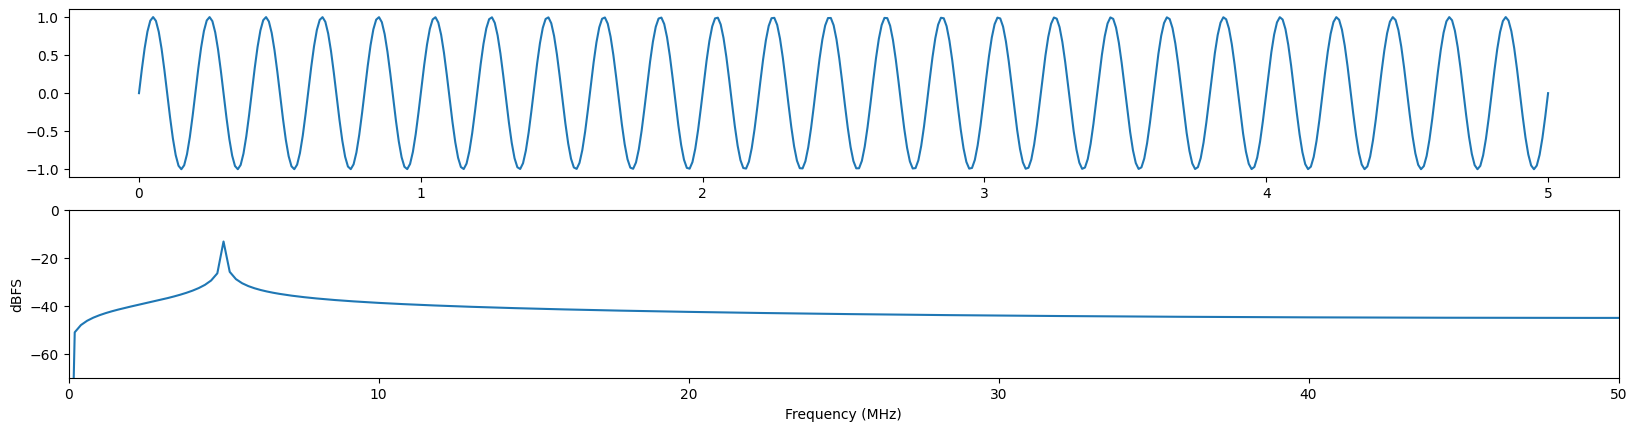

In [15]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x = np.sin( 2*np.pi*5*t )

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t,x.real )

ax2 = fig.add_subplot(412)
doRealPsd( ax2, 0, 10, fs, x )

Great, real looks good, let's try adding

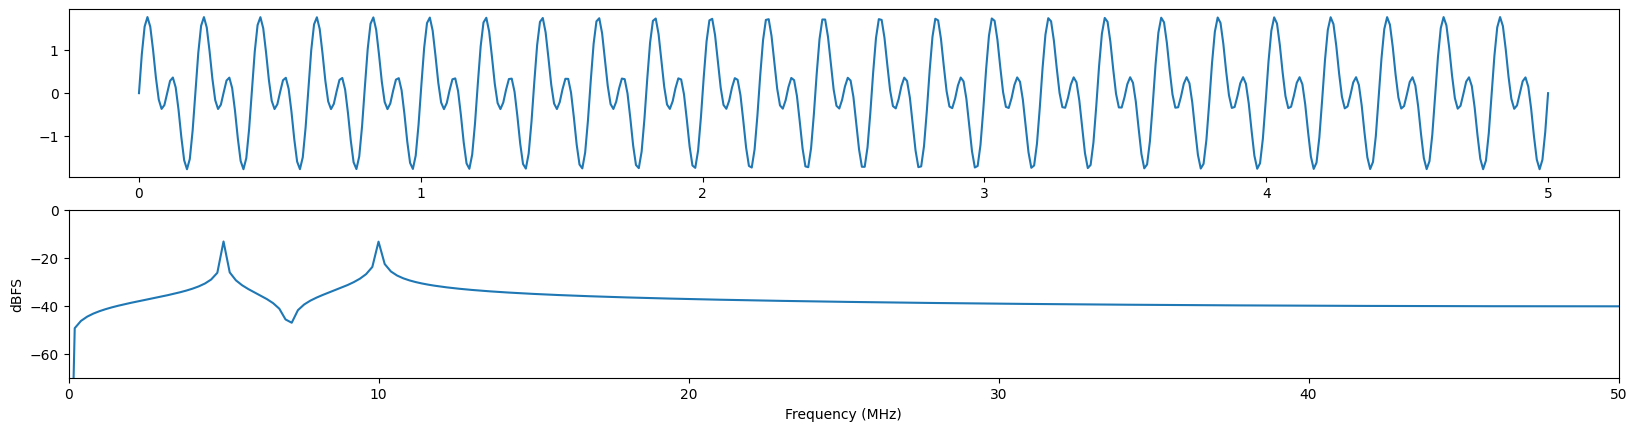

In [18]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x_1 = np.sin( 2*np.pi*5*t )
x_2 = np.sin( 2*np.pi*10*t )
x = x_1 + x_2

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t,x.real )

ax2 = fig.add_subplot(412)
doRealPsd( ax2, 0, 10, fs, x )

Perfect, lets try mixing...

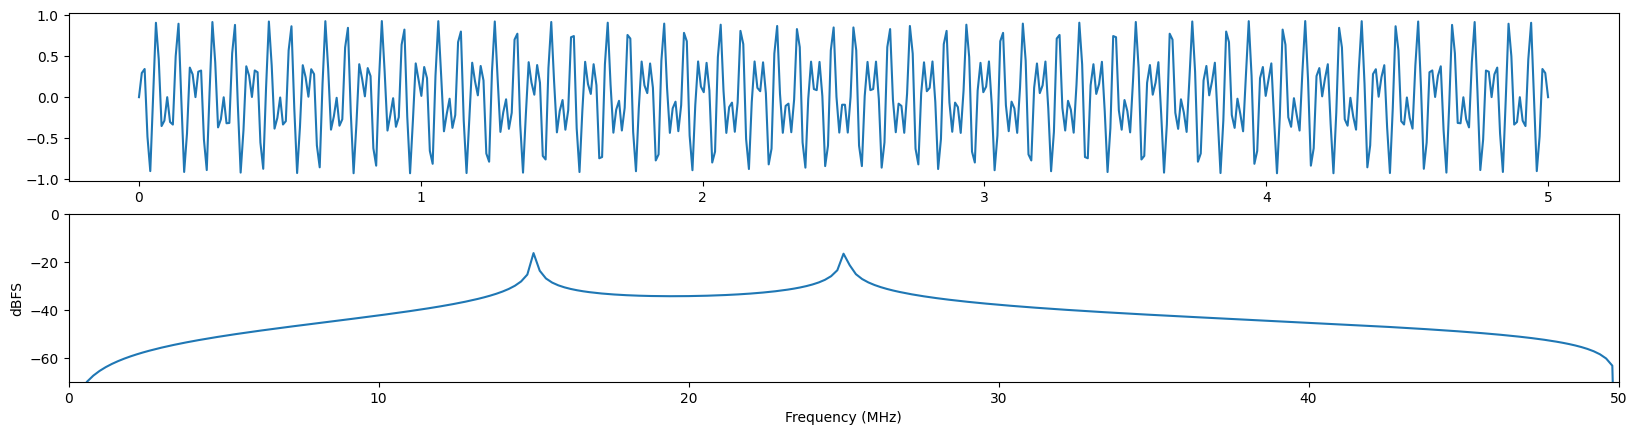

In [20]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x_1 = np.sin( 2*np.pi*5*t )
x_2 = np.sin( 2*np.pi*20*t )
x = x_1 * x_2

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t,x.real )

ax2 = fig.add_subplot(412)
doRealPsd( ax2, 0, 10, fs, x )

I'll be damned, it works
lets try one that mixes down to 0

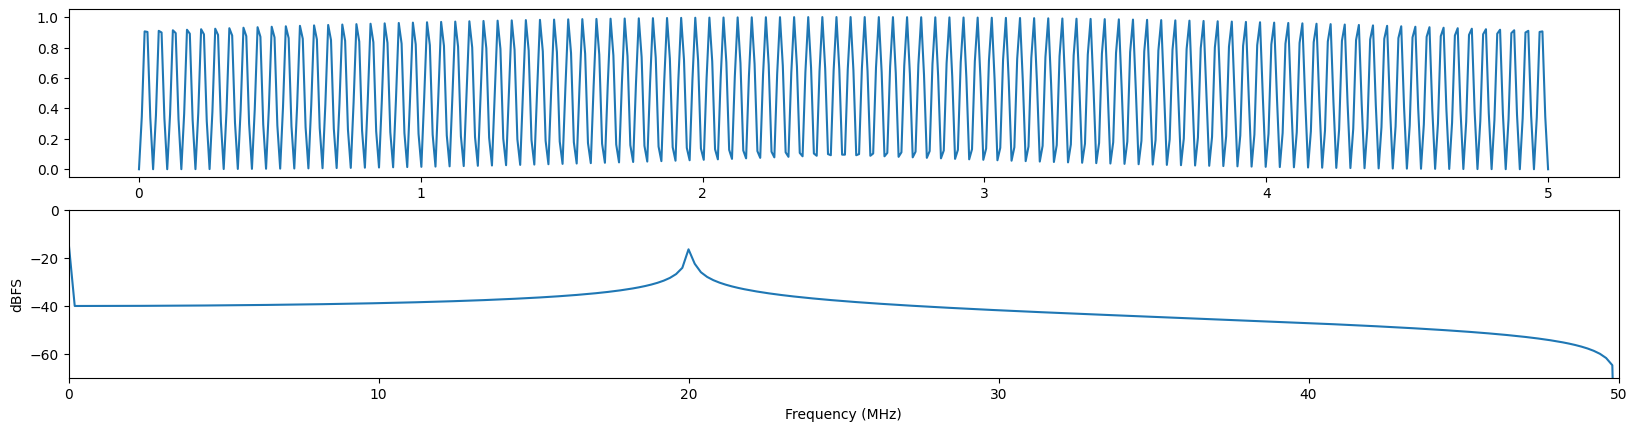

In [21]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x_1 = np.sin( 2*np.pi*10*t )
x_2 = np.sin( 2*np.pi*10*t )
x = x_1 * x_2

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t,x.real )

ax2 = fig.add_subplot(412)
doRealPsd( ax2, 0, 10, fs, x )

Idk what it means exactly, but we see a 0 frequency component!
Lets try a negative freq...

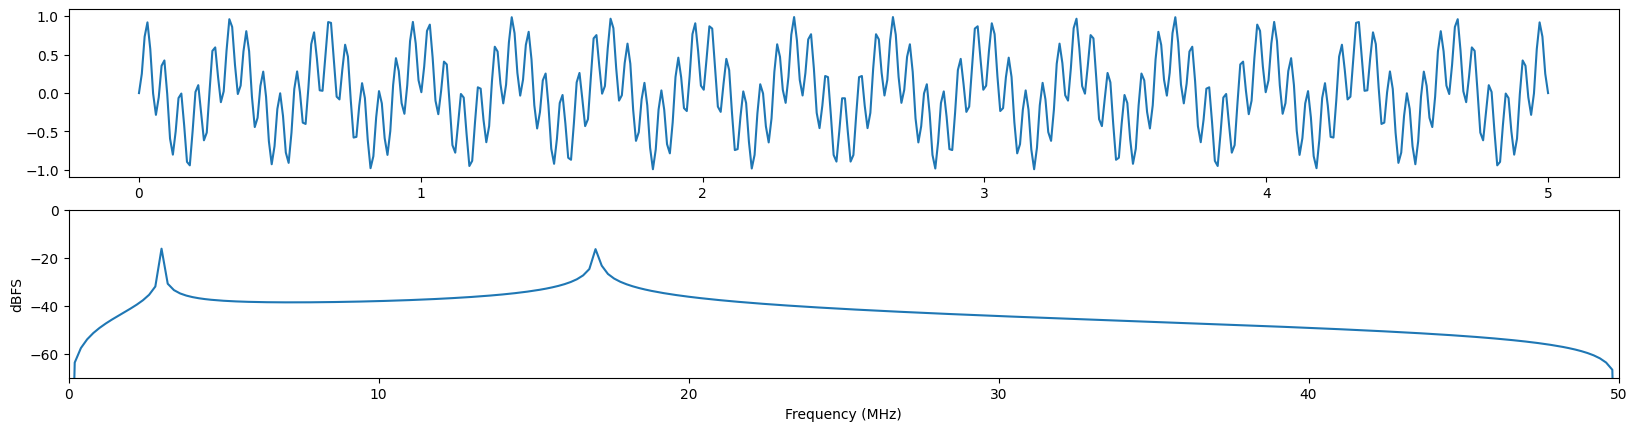

In [22]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x_1 = np.sin( 2*np.pi*7*t )
x_2 = np.sin( 2*np.pi*10*t )
x = x_1 * x_2

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t,x.real )
`
ax2 = fig.add_subplot(412)
doRealPsd( ax2, 0, 10, fs, x )

VERY cool. We see a 3 Hz signal, which is actually -3 Hz!

OK let's do some complex

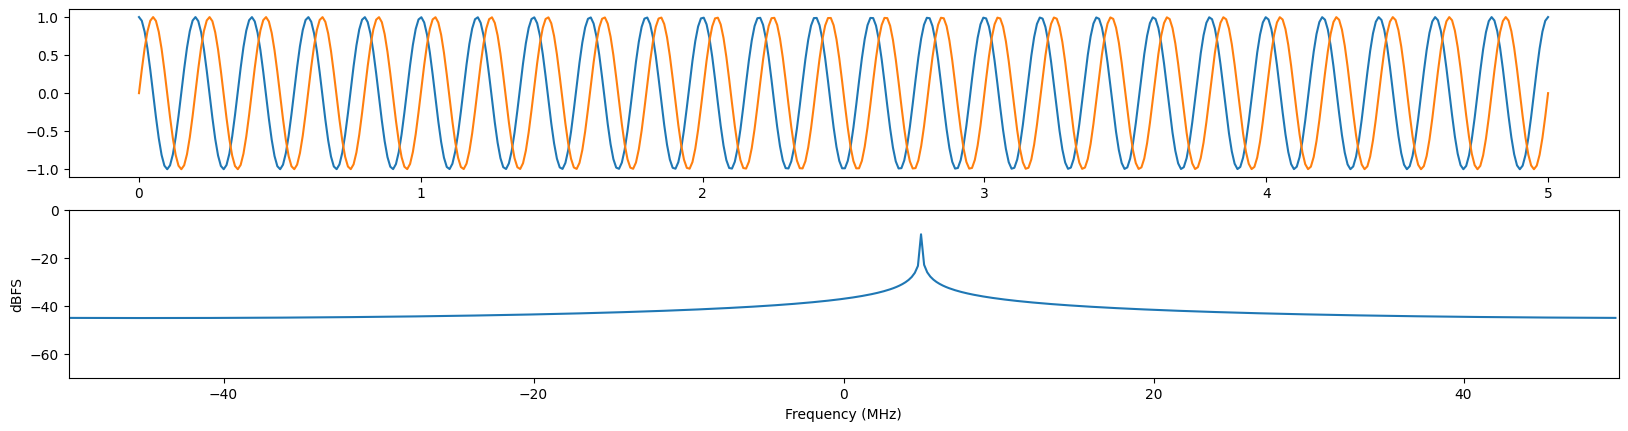

In [16]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x = np.exp( 2j * np.pi * 5 * t )

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t, x.real )
ax1.plot( t, x.imag )

ax2 = fig.add_subplot(412)
doComplexPsd( ax2, 0, 10, fs, x )

Ok great, it works, now lets do a negative frequency complex sinusoid

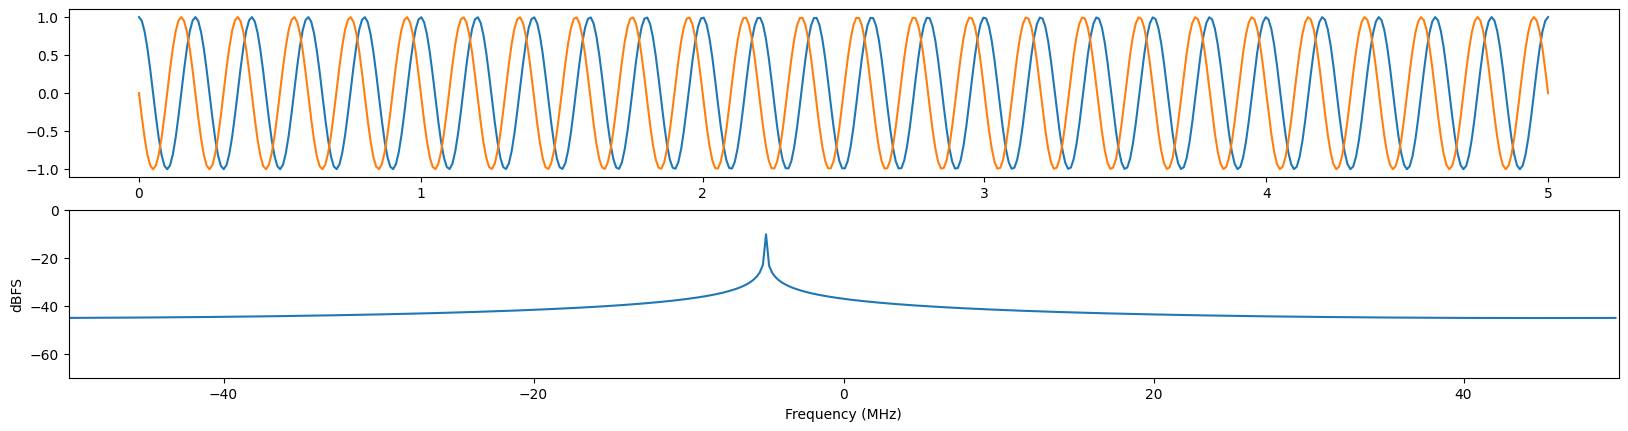

In [17]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x = np.exp( 2j * np.pi * -5 * t )

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t, x.real )
ax1.plot( t, x.imag )

ax2 = fig.add_subplot(412)
doComplexPsd( ax2, 0, 10, fs, x )

Note how you can't tell that signal is negative freq, but fft shows it is!

Lets try multiplying two complexes

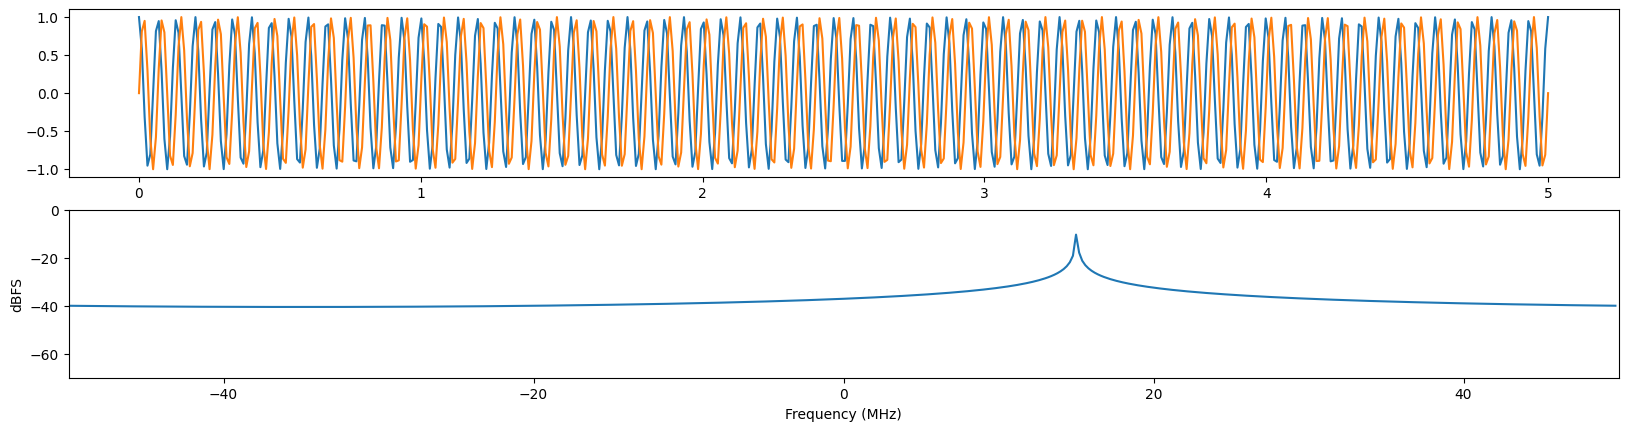

In [24]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x_1 = np.exp( 2j * np.pi * 10 * t )
x_2 = np.exp( 2j * np.pi * 5 * t )
x = x_1 * x_2

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t, x.real )
ax1.plot( t, x.imag )

ax2 = fig.add_subplot(412)
doComplexPsd( ax2, 0, 10, fs, x )

Sure enough, it doesn't do a +-, only a plus

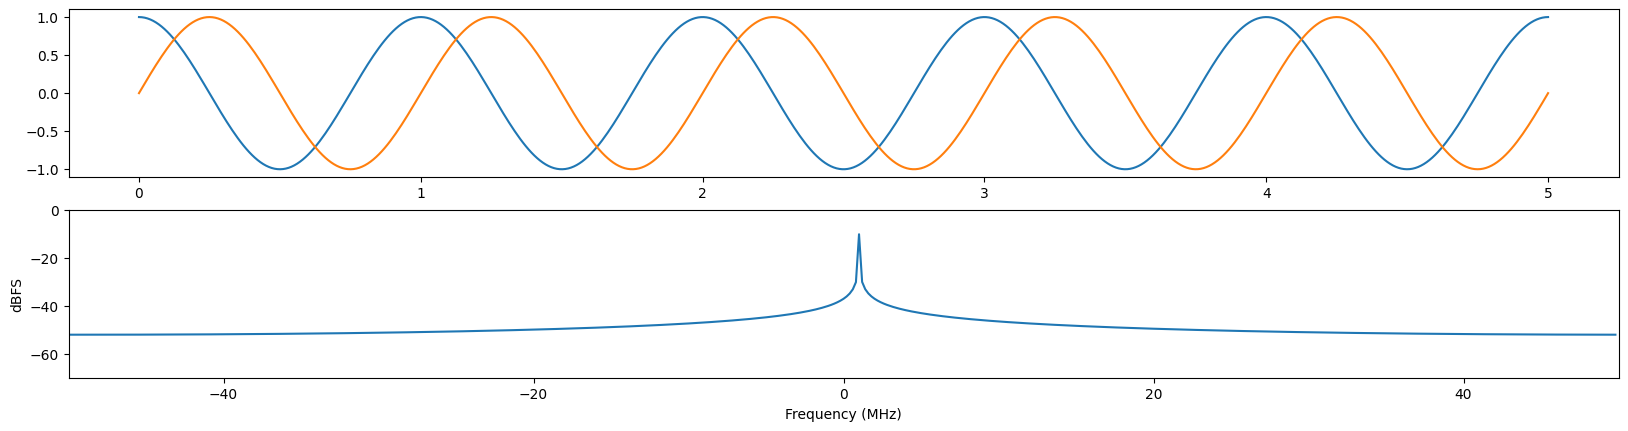

In [26]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x_1 = np.exp( 2j * np.pi * 10 * t )
x_2 = np.exp( 2j * np.pi * -9 * t )
x = x_1 * x_2

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t, x.real )
ax1.plot( t, x.imag )

ax2 = fig.add_subplot(412)
doComplexPsd( ax2, 0, 10, fs, x )

Negative freqs work exactly the same way

Now, what the hell happens when we multiply a real by a complex

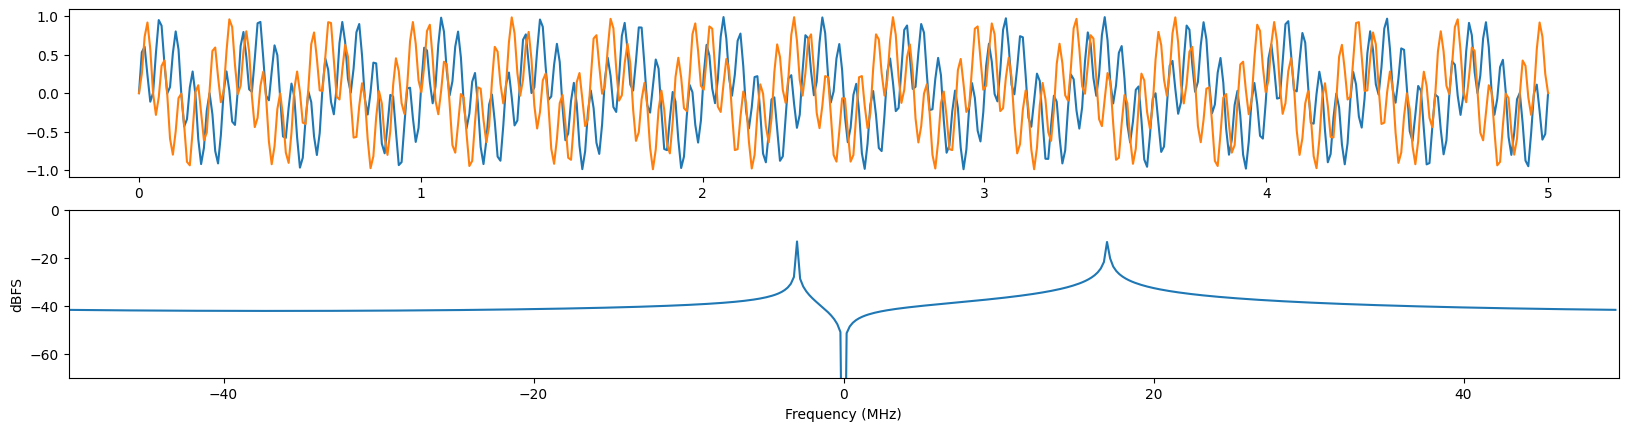

In [29]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x_1 = np.sin( 2*np.pi*10*t )
x_2 = np.exp( 2j * np.pi * 7 * t )
x = x_1 * x_2

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t, x.real )
ax1.plot( t, x.imag )

ax2 = fig.add_subplot(412)
doComplexPsd( ax2, 0, 10, fs, x )

Interesting, and not what I expected.

Pysdr shifts it down to 0Hz, so let's fuck with that I guess

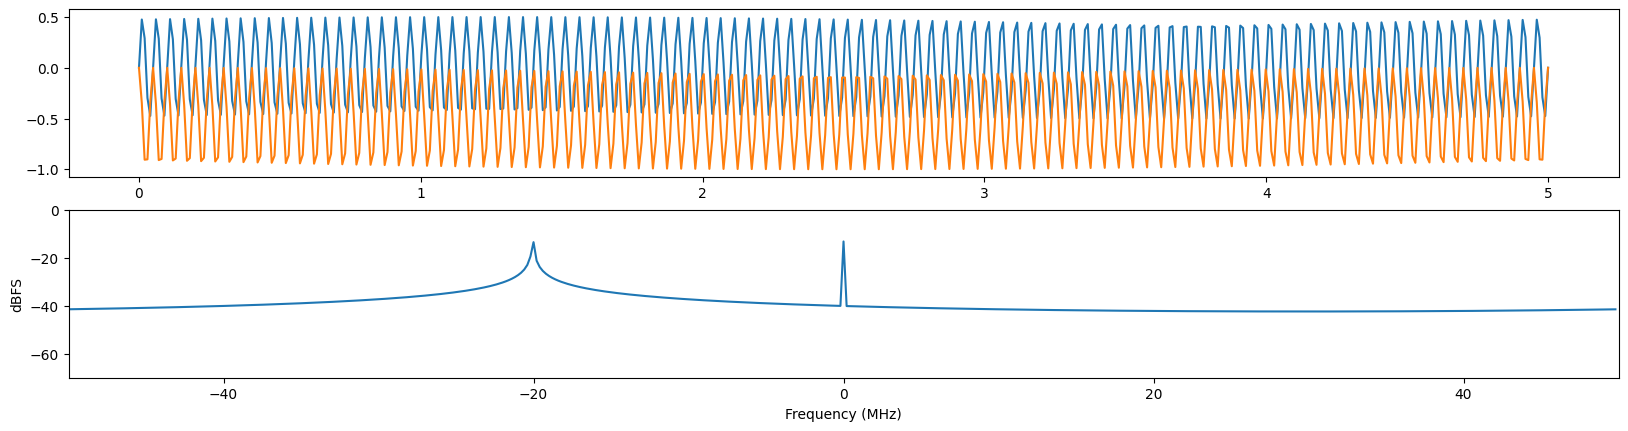

In [30]:
fs = 100
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
x_1 = np.sin( 2*np.pi*10*t )
x_2 = np.exp( 2j * np.pi * -10 * t )
x = x_1 * x_2

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( t, x.real )
ax1.plot( t, x.imag )

ax2 = fig.add_subplot(412)
doComplexPsd( ax2, 0, 10, fs, x )

In [ ]:
OK, sure... pysdr filters after that step

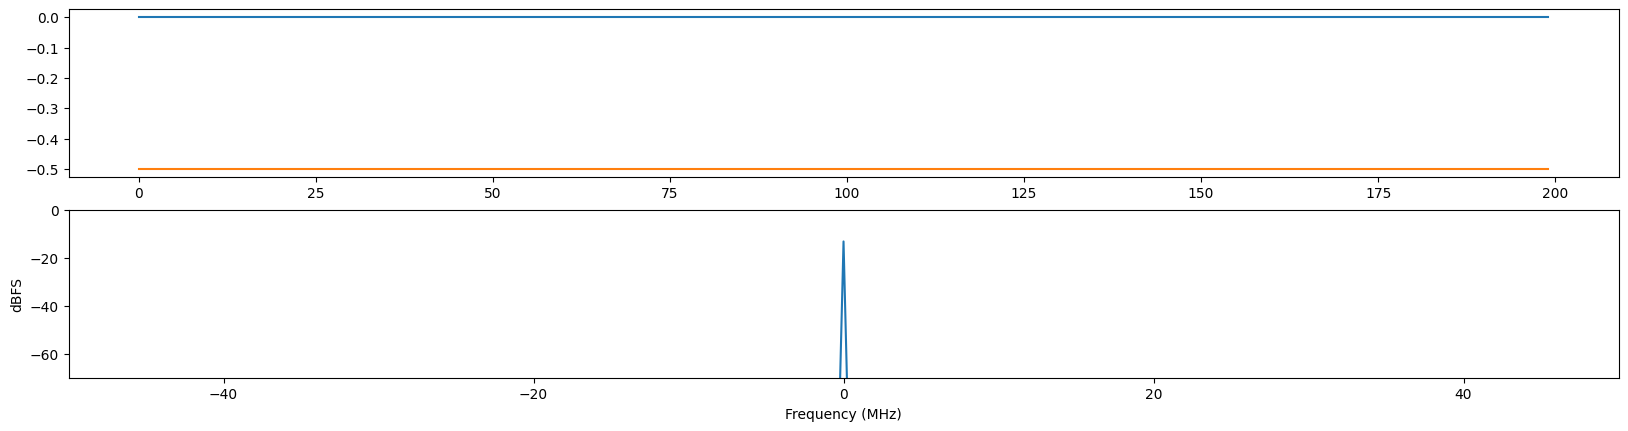

In [36]:
# Low-Pass Filter
taps = firwin(numtaps=101, cutoff=7, fs=fs)
x = np.convolve(x, taps, 'valid')


# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot( x.real )
ax1.plot( x.imag )

ax2 = fig.add_subplot(412)
doComplexPsd( ax2, 0, 10, fs, x )

OK Cool, there's your DC bro!

Let's try doing a little bit of phase modulation for shits and giggles

OK this one needs some explanation

We startwith a real signal, which initially has a phase offset of 0, and then half way through our time
vector gets an instant phase offset of 90 degrees.

We multiply that real signal with a complex signal of opposite frequency, which gets a signal at 0 hz and -20Hz

We filter, isolating just the 0 Hz signal

I then plot the angles of that 0Hz signal and sure enough. It's 0, and then suddenly its 90, as expected



The only thing I'm not really sure about is the angle (phase) of the mixed signal. We see the angle is spinning
or whatever between -pi/2 and pi/2, but with the offset I had expected it to stay within that range. Instead it really is a constant offset of 90. IE now it ranges from [0,pi]
- could be some bullshit with the negative freq component

Min/Max of angles before phase offset -1.545024958488142 1.5073107609660512
Min/Max of angles after phase offset -1.964386723728472e-15 3.0535928593716033
4.167942844569155e-06 1.5708004878399946
Expected 0.0 and 1.5707963267948966


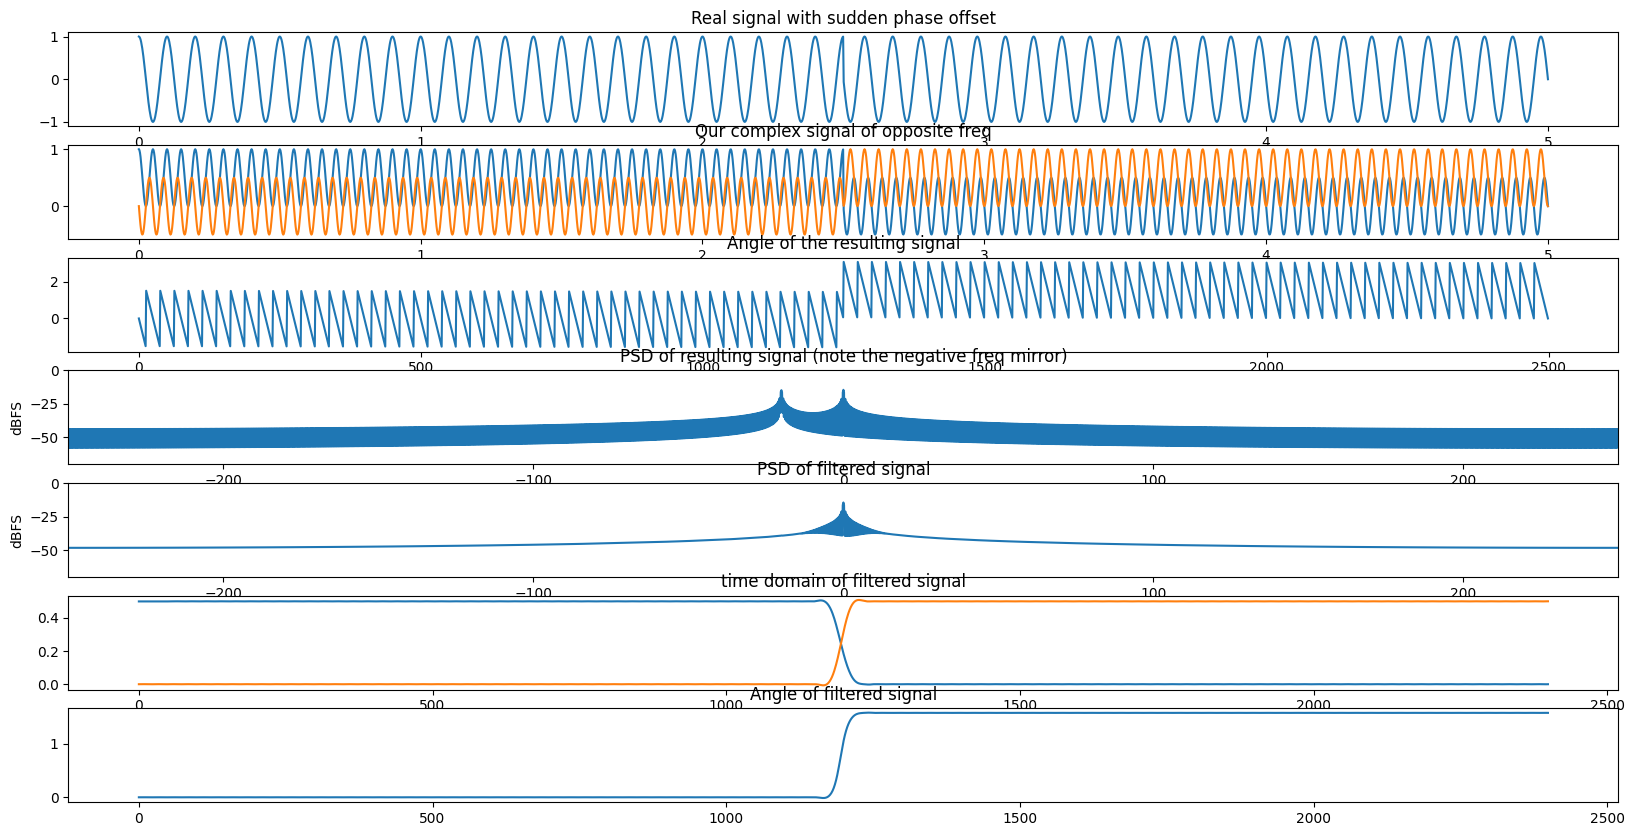

In [60]:
fs = 500
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
phi = np.zeros(len(t))
phi[len(phi)//2:] = np.pi/2 # 90 degree phase offset half way through
x_1 = np.cos( 2*np.pi*10*t+phi )
x_2 = np.exp( 2j * np.pi * -10 * t )
x = x_1 * x_2

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax0 = fig.add_subplot(711)
ax0.set_title( "Real signal with sudden phase offset")
ax0.plot( t, x_1 )

ax1 = fig.add_subplot(712)
ax1.set_title( "Our complex signal of opposite freq")
ax1.plot( t, x.real )
ax1.plot( t, x.imag )

angles = np.angle(x)
ax1 = fig.add_subplot(713)
ax1.set_title( "Angle of the resulting signal" )
ax1.plot( angles )

print(
    "Min/Max of angles before phase offset",
    min( angles[:len(angles)//2-fs]),
    max( angles[:len(angles)//2-fs]),
)

print(
    "Min/Max of angles after phase offset",
    min( angles[len(angles)//2+fs:]),
    max( angles[len(angles)//2+fs:]),
)

ax2 = fig.add_subplot(714)
ax2.set_title( "PSD of resulting signal (note the negative freq mirror)")
doComplexPsd( ax2, 0, 10, fs, x )

# Filter
taps = firwin(numtaps=101, cutoff=7, fs=fs)
x = np.convolve(x, taps, 'valid')

ax3 = fig.add_subplot(715)
ax3.set_title("PSD of filtered signal")
doComplexPsd( ax3, 0, 10, fs, x )

ax1 = fig.add_subplot(716)
ax1.set_title( "time domain of filtered signal")
ax1.plot( x.real )
ax1.plot( x.imag )

angles = np.angle(x)
ax1 = fig.add_subplot(717)
ax1.set_title( "Angle of filtered signal" )
ax1.plot( angles )


print( angles[0], angles[-1] )
print( f"Expected {phi[0]} and {phi[-1]}")